# Regressão Logística

* Um algoritmo de um modelo linear para **classificação** usando uma função como
$$ y(s) = \frac{1}{1+e^{-s}} = \frac{e^s}{1+e^s},$$
onde podemos utilizar o mesmo procedimento em **regressão linear** para calcular o parâmetro $s$, como os coeficientes linear (intercept_) e angular (coef_)

* Na regressão logística, ao invés de **classificar binariamente** os valores independentes, ele retorna a **probabilidade de um evento ocorrer**:
    - Muito utiizado em analise de risco de créditos, previsão de saída de clientes e probabilidade de ocorrência de doenças.

    - Se considerarmos um caso binário, também é possível classificar via Regressão Logística
    <p align="center">
    <img src="image.png">
    </p>

    - E por fim, é possível fazer a previsão para qualquer outro valor, mesmo no caso binário. Por exemplo, no primeiro e terceiro gráfico, not-ase que o ponto laranja está mais próximo do valor zero, enquanto o segundo e o quarto gráfico estão mais próximos de 1, classificando esses novos valores.
    <p align="center">
    <img src="image2.png">
    </p>

In [20]:
# Importação o dataset Iris

from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True, as_frame=True) # Separa os dados em features e target

print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32


* Vamos considerar inicialmente apenas a coluna 'petal width (cm)' e os targets 0 e 1

In [21]:
# Transformação dos dados para considerar apenas as classes 0 e 1 e a feature 'petal width (cm)'
X = X.loc[y.isin([0, 1]), ['petal width (cm)']].values
y = y[y.isin([0, 1])].values

In [67]:
# Separação dos dados em treino e teste com train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

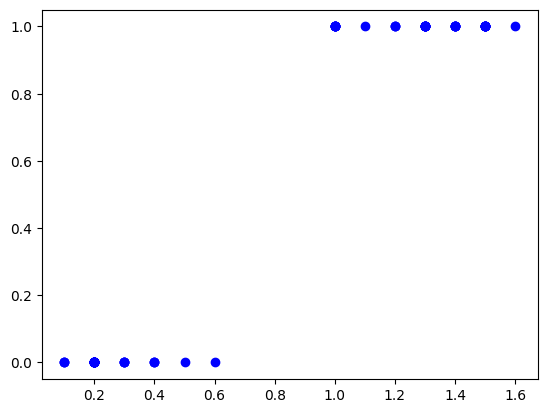

In [18]:
# Gráfico de dispersão dos dados
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(X_train, y_train, color='blue', label='Train')

plt.show()

In [25]:
# Criando o modelo de Regressão Logística
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [26]:
# Coefientes do modelo
print(clf.coef_)
print(clf.intercept_)

[[3.85162333]]
[-2.83304629]


* Utilizando os coeficientes encontrados pelo classificador, podemos agora encontrar $s$ da função dada pelo modelo. O Scipy possui essa função em sua biblioteca:
    - scipy.special.expit():

    expit(x) = 1/(1+expit(-x))

In [28]:
from scipy.special import expit

In [33]:
# Gerando arrays de valores continuos para plotar a curva
import numpy as np
valores_x = np.linspace(X_train.min(), X_train.max(), 100)

* Agora, para construir a função de regressão logística, podemos utilizar os coeficientes obtidos pelo classificador de maneira que:
    - $w_0 =$ clf.intercept_[0]
    - $w_1 =$ clf.coef_[0][0]

    - Assim, utilizamos: expit($w_0 + w_1\cdot X$) para encontrar $s$

In [37]:
valores_y_cont = expit(clf.intercept_[0] + clf.coef_[0][0] * valores_x)

valores_y_train = expit(clf.intercept_[0] + clf.coef_[0][0] * X_train)

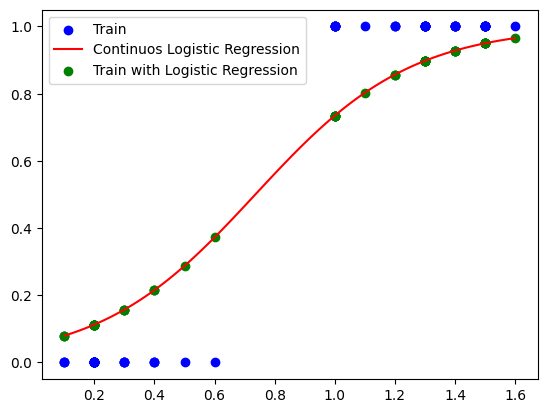

In [42]:
fig, ax = plt.subplots()
ax.scatter(X_train, y_train, color='blue', label='Train')

ax.plot(valores_x, valores_y_cont, color='red', label='Continuos Logistic Regression')

ax.scatter(X_train, valores_y_train, color='green', label='Train with Logistic Regression')

plt.legend()
plt.show()

* Podemos atribuir uma "dispersão" dos pontos de treino em relação ao modelo de Regressão Logística

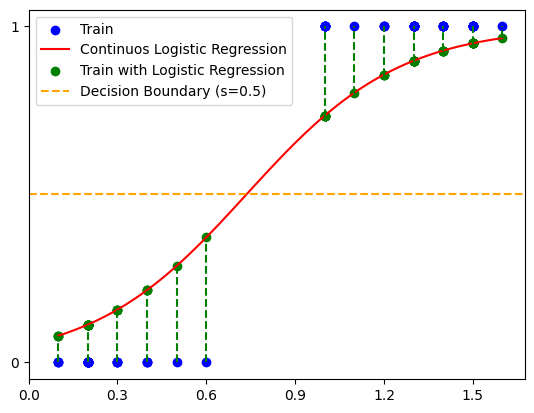

In [43]:
fig, ax = plt.subplots()
ax.scatter(X_train, y_train, color='blue', label='Train')

ax.plot(valores_x, valores_y_cont, color='red', label='Continuos Logistic Regression')

ax.scatter(X_train, valores_y_train, color='green', label='Train with Logistic Regression')

ax.axhline(y=0.5, color='orange', linestyle='--', label='Decision Boundary (s=0.5)')

ax.plot([0.1,0.1],[0,0.07883025],'--g')
ax.plot([0.2,0.2],[0,0.11156652],'--g')
ax.plot([0.3,0.3],[0,0.15560101],'--g')
ax.plot([0.4,0.4],[0,0.21285167],'--g')
ax.plot([0.5,0.5],[0,0.28408003],'--g')
ax.plot([0.6,0.6],[0,0.36800066],'--g')
ax.plot([1,1],[0.72972574,1],'--g')
ax.plot([1.1,1.1],[0.79846697,1],'--g')
ax.plot([1.2,1.2],[0.85324086,1],'--g')
ax.plot([1.3,1.3],[0.89508404,1],'--g')
ax.plot([1.4,1.4],[0.92603135,1],'--g')
ax.plot([1.5,1.5],[0.94837655,1],'--g')
ax.plot([1.6,1.6],[0.96423221,1],'--g')

ax.set(yticks=[0,1],xticks=[0,0.3,0.6,0.9,1.2,1.5])

plt.legend()
plt.show()

* A distância entre os pontos (reais) de treinamento (pontos azuis) em relação aos pontos de treinamneto com Regressão Logística (pontos verdes), são dadas pelo modelo utilizando a função **expit(x)* do scipy e estão relacionadas com a probabilidade do valor ser classificado como 0 ou 1.

In [ ]:
# Previsão dos resultados com o modelo utilizando os dados de treino
clf.predict(X_train)

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1])

In [48]:
# probabilidades de ser 0 ou 1

clf.predict_proba(X_train[0:5])

array([[0.88722677, 0.11277323],
       [0.26530467, 0.73469533],
       [0.78455262, 0.21544738],
       [0.05000239, 0.94999761],
       [0.07180909, 0.92819091]])

* Vamos pegar o primeiro array deste conjunto de dados; 
    - Aqui, 0.88722677 é o valor em x que cai no modelo de regressão (na curva vermelha)
    - 0.11277323 é a probabilidade do primeiro ponto ser classificado como 0 ou 1, este valor representa a distância do ponto real em relação ao ponto gerado pelo modelo e é exatamente a probabilidade de classificação, por estar mais próxima de 0, então o valor é classificado como 0

## Utilizando a previsão na base de teste

In [68]:
valores_x_test = np.linspace(X_test.min(), X_test.max(), 100)

In [70]:
valores_y_test_cont = expit(clf.intercept_[0] + clf.coef_[0][0] * valores_x_test)

valores_y_test = expit(clf.intercept_[0] + clf.coef_[0][0] * X_test)

In [ ]:
y_pred_test = clf.predict_proba(X_test)

In [81]:
y_pred_test[:,1]

array([0.96542879, 0.89789616, 0.98369551, 0.15741893, 0.21544738,
       0.11277323, 0.11277323, 0.8027766 , 0.11277323, 0.11277323,
       0.15741893, 0.11277323, 0.85679257, 0.11277323, 0.85679257,
       0.11277323, 0.92819091, 0.97621699, 0.07959343, 0.21544738,
       0.89789616, 0.89789616, 0.21544738, 0.11277323, 0.8027766 ,
       0.21544738, 0.15741893, 0.89789616, 0.07959343, 0.94999761,
       0.11277323, 0.11277323, 0.96542879])

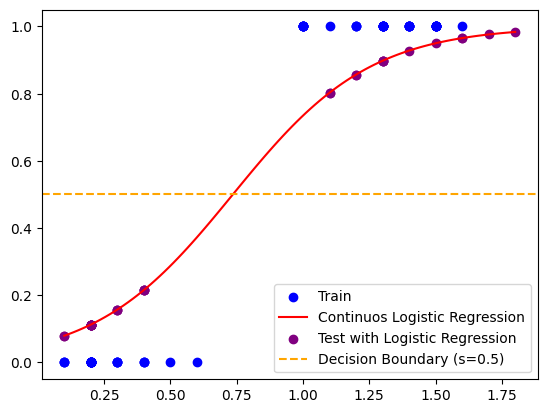

In [72]:
fig, ax = plt.subplots()
ax.scatter(X_train, y_train, color='blue', label='Train')

ax.plot(valores_x_test, valores_y_test_cont, color='red', label='Continuos Logistic Regression')

ax.scatter(X_test,y_pred_test[:,1], color='purple', label='Test with Logistic Regression')

ax.axhline(y=0.5, color='orange', linestyle='--', label='Decision Boundary (s=0.5)')


plt.legend()
plt.show()

In [83]:
y_pred_test_ = clf.predict(X_test)

In [84]:
# Avaliando o erro com matriz de confusão
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_test_)

array([[19,  0],
       [ 0, 14]], dtype=int64)

* Note que, como os valores nos elementos da diagonal secundária são nulos, então nosso modelo acertou todas as previsões

## Multivariáveis

In [85]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True, as_frame=True) # Separa os dados em features e target

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [88]:
clf2 = LogisticRegression(random_state=0, max_iter=200).fit(X_train, y_train)

In [90]:
clf2.coef_

# Três linhas, uma para cada classe
# Cada coluna representa o coeficiente de cada feature (4 features)

array([[-0.38854813,  0.85385236, -2.24492992, -0.95238261],
       [ 0.43789114, -0.36134237, -0.12373794, -0.77276791],
       [-0.04934301, -0.49250999,  2.36866786,  1.72515051]])

In [ ]:
clf2.intercept_

# Três valores, um para cada classe

array([  8.69398967,   2.12547436, -10.81946403])

In [95]:
y_pred2 = clf2.predict(X_test)

In [96]:
confusion_matrix(y_test, y_pred2)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]], dtype=int64)

In [97]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred2)

1.0

* O modelo está com 100% de acerto e não precisa ser melhorado.